In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.5.1     ✔ purrr   1.0.2
✔ tibble  3.2.1     ✔ dplyr   1.1.4
✔ tidyr   1.3.1     ✔ stringr 1.5.1
✔ readr   2.1.5     ✔ forcats 1.0.0
Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘tibble’ was built under R version 4.2.3”
Warning message:
“package ‘tidyr’ was built under R version 4.2.3”
Warning message:
“package ‘readr’ was built under R version 4.2.3”
Warning message:
“package ‘purrr’ was built under R version 4.2.3”
Warning message:
“package ‘dplyr’ was built under R version 4.2.3”
Warning message:
“package ‘stringr’ was built under R version 4.2.3”
Warning message:
“package ‘forcats’ was built under R version 4.2.3”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


## [7.2.4 Exercises](https://r4ds.hadley.nz/data-import.html#exercises)

### 1. What function would you use to read a file where fields were separated with “`|`”?

        To read a file that has fields are separated by "|", I would use the function read_delim and specify delim = "|"

In [2]:
read_delim(
            "a|b|c
            f|g|h", 
            delim="|", 
            col_names= FALSE,
            show_col_types=FALSE)

X1,X2,X3
<chr>,<chr>,<chr>
a,b,c
f,g,h


### 2. Apart from `file`, `skip`, and `comment`, what other arguments do `read_csv()` and `read_tsv()` have in common?

According to the [documentation](https://readr.tidyverse.org/reference/read_delim.html), they have the same default values for all arguments and they have every argument in common. In a tsv the file is tab delimited and in csv the file is comma delimited 

```r
read_csv(
  file,
  col_names = TRUE,
  col_types = NULL,
  col_select = NULL,
  id = NULL,
  locale = default_locale(),
  na = c("", "NA"),
  quoted_na = TRUE,
  quote = "\"",
  comment = "",
  trim_ws = TRUE,
  skip = 0,
  n_max = Inf,
  guess_max = min(1000, n_max),
  name_repair = "unique",
  num_threads = readr_threads(),
  progress = show_progress(),
  show_col_types = should_show_types(),
  skip_empty_rows = TRUE,
  lazy = should_read_lazy()
)
read_tsv(
  file,
  col_names = TRUE,
  col_types = NULL,
  col_select = NULL,
  id = NULL,
  locale = default_locale(),
  na = c("", "NA"),
  quoted_na = TRUE,
  quote = "\"",
  comment = "",
  trim_ws = TRUE,
  skip = 0,
  n_max = Inf,
  guess_max = min(1000, n_max),
  progress = show_progress(),
  name_repair = "unique",
  num_threads = readr_threads(),
  show_col_types = should_show_types(),
  skip_empty_rows = TRUE,
  lazy = should_read_lazy()
)
```

### 3. What are the most important arguments to `read_fwf()`?

The most important arguments for `read_fwf()` are:
```r
    col_positions()
    fwf_widths()
    fwf_positions() 
    fwf_cols()
```

### 4. Sometimes strings in a CSV file contain commas. To prevent them from causing problems, they need to be surrounded by a quoting character, like " or '. By default, `read_csv()` assumes that the quoting character will be ". To read the following text into a data frame, what argument to `read_csv()` do you need to specify?  
```r
     "x,y\n1,'a,b'"
```

In [3]:
read_csv(
    "x,y\n1,'a,b'", 
    quote="'",
    show_col_types=FALSE
)


x,y
<dbl>,<chr>
1,"a,b"


### 5. Identify what is wrong with each of the following inline CSV files. What happens when you run the code?
```r
        read_csv("a,b\n1,2,3\n4,5,6") #there are not enough data in the first row, if the first column has no name then it should be NA, a, b 
        read_csv("a,b,c\n1,2\n1,2,3,4") #uneven number of columns in each row
        read_csv("a,b\n\"1")#the quote is telling the read operation to ignore the 1
        read_csv("a,b\n1,2\na,b") #the only issue I can see is that it's unfriendly for there to be char and int in the same column
        read_csv("a;b\n1;3")#This uses the wrong delimiter for the function read_csv, a csv file should be comma delimited not semicolon delimited
```

In [4]:
#read_csv("a,b\n1,2,3\n4,5,6") there are not enough data in the first row, if the first column has no name then it should be NA, a, b 
read_csv(",a,b\n1,2,3\n4,5,6") #fixed
#read_csv("a,b,c\n1,2\n1,2,3,4") #uneven number of columns in each row
read_csv(",a,b,c\n1,2,,\n1,2,3,4", col_names=FALSE)#fixed chose to do false because then it doesn't rename the first column to ...1
# read_csv("a,b\n\"1")#the quote is telling the read operation to ignore the 1
read_csv("a,b\n\"\",1")#fixed by adding a second " so that it reads as an NA value
# read_csv("a,b\n1,2\na,b")#the only issue I can see is that it's unfriendly for there to be char and int in the same column
read_csv("a,b\n1,2\na,b")#fixed??
# read_csv("a;b\n1;3") #This uses the wrong delimiter for the function read_csv, a csv file should be comma delimited not semicolon delimited
read_delim("a;b\n1;3", delim=";")#fixed
read_csv("a,b\n1,3")#also fixed

New names:
• `` -> `...1`
Rows: 2 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (3): ...1, a, b

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1,a,b
<dbl>,<dbl>,<dbl>
1,2,3
4,5,6


Rows: 3 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): X2, X3, X4
dbl (1): X1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1,X2,X3,X4
<dbl>,<chr>,<chr>,<chr>
NA,a,b,c
1,2,NA,NA
1,2,3,4


Rows: 1 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (1): b
lgl (1): a

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


a,b
<lgl>,<dbl>
NA,1


Rows: 2 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): a, b

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


a,b
<chr>,<chr>
1,2
a,b


Rows: 1 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
dbl (2): a, b

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


a,b
<dbl>,<dbl>
1,3


Rows: 1 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (2): a, b

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


a,b
<dbl>,<dbl>
1,3


### 6. Practice referring to non-syntactic names in the following data frame by: 


- a. Extracting the variable called `1`.
- b. Plotting a scatterplot of `1` vs. `2`.
- c. Creating a new column called `3`, which is `2` divided by `1`.
- d. Renaming the columns to `one`, `two`, and `three`.

```r
      annoying <- tibble(
        `1` = 1:10,
        `2` = `1` * 2 + rnorm(length(`1`))
      )
```

In [5]:
annoying <- tibble(
  `1` = 1:10,
  `2` = `1` * 2 + rnorm(length(`1`))
)

In [6]:
annoying$`1`

[1]  1  2  3  4  5  6  7  8  9 10

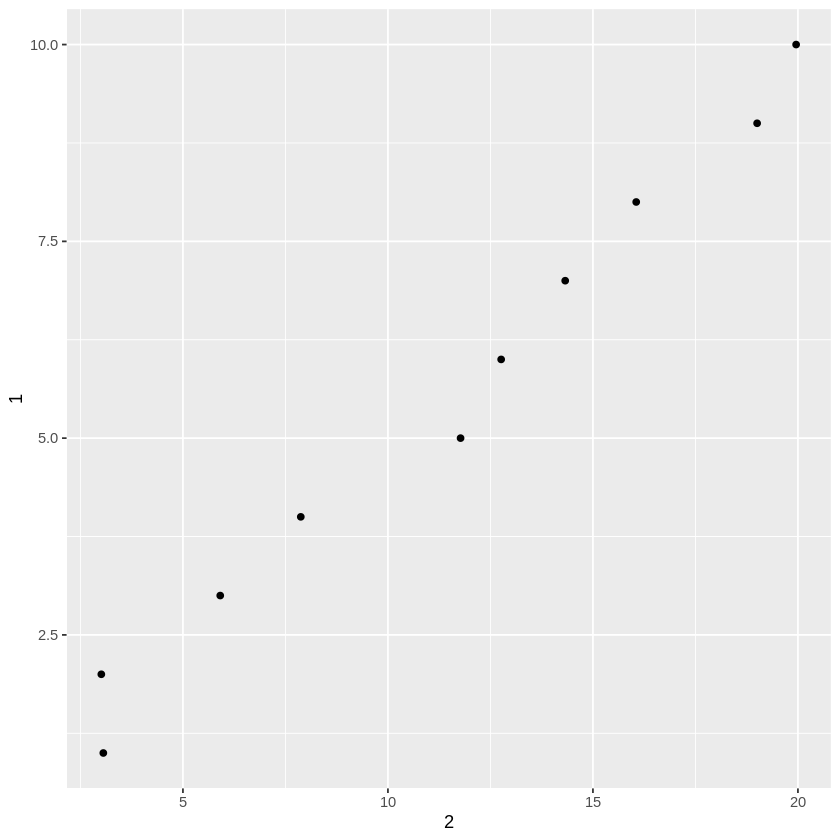

In [7]:
annoying|>
    ggplot(aes(x=`2`, y = `1`))+
    geom_point()

In [8]:
annoying$`3`=annoying$`2`/annoying$`1`

In [12]:
annoying|>
    rename("one"=`1`,"two"=`2`,"three"=`3`)

one,two,three
<int>,<dbl>,<dbl>
1,3.058360,3.058360
2,3.009609,1.504804
3,5.909925,1.969975
4,7.874567,1.968642
5,11.771741,2.354348
6,12.761806,2.126968
7,14.323943,2.046278
8,16.055730,2.006966
9,19.004631,2.111626
